In [1]:
import stata_setup
# If Windows 'uncomment' the following line
#stata_setup.config("C:/Program Files/Stata17/", "mp")

# If Linux 'uncomment' the following line
stata_setup.config("/usr/local/stata17/", "mp")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 4-core  perpetual
Serial number: 501706303466
  Licensed to: David Tomas Jacho-Chavez
               Emory University

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


### Example: Doctor Visits of the Elderly

Loading the data set

In [2]:
%%stata
use "http://www.stata-press.com/data/r13/docvisits", clear
list docvis private chronic female income in 1/6, clean 


. use "http://www.stata-press.com/data/r13/docvisits", clear

. list docvis private chronic female income in 1/6, clean 

       docvis   private   chronic   female    income  
  1.        0         1         0        1        30  
  2.        1         1         0        0        10  
  3.       15         1         1        1        27  
  4.        0         0         0        0     11.25  
  5.        2         1         0        1     76.33  
  6.        2         1         0        0   185.557  

. 


The _structural model_ of interest is

\begin{align*}
&  \mathbb{E}[\left.  \mathtt{docvis}\right\vert \mathtt{private}\text{,}\mathtt{chronic}\text{,}\mathtt{female}\text{,}\mathtt{income}]\\
&  =\exp\{\beta_{1}\mathtt{private}_{i}+\beta_{2}\mathtt{chronic}_{i}%
+\beta_{3}\mathtt{female}_{i}+\beta_{4}\mathtt{income}_{i}+\beta_{5}\}\text{,}%
\end{align*}

where

* $\texttt{docvis}$: number of doctor visits.
* $\texttt{private}$: =1 if private insurance.
* $\texttt{chronic}$: =1 if a chronic condition.
* $\texttt{female}$: =1 if female.
* $\texttt{income}$: income in thousand of USD.


. set scheme s1mono

. histogram docvis, start(0) width(1) xtitle(Doctor Visits)
(bin=134, start=0, width=1)

. 


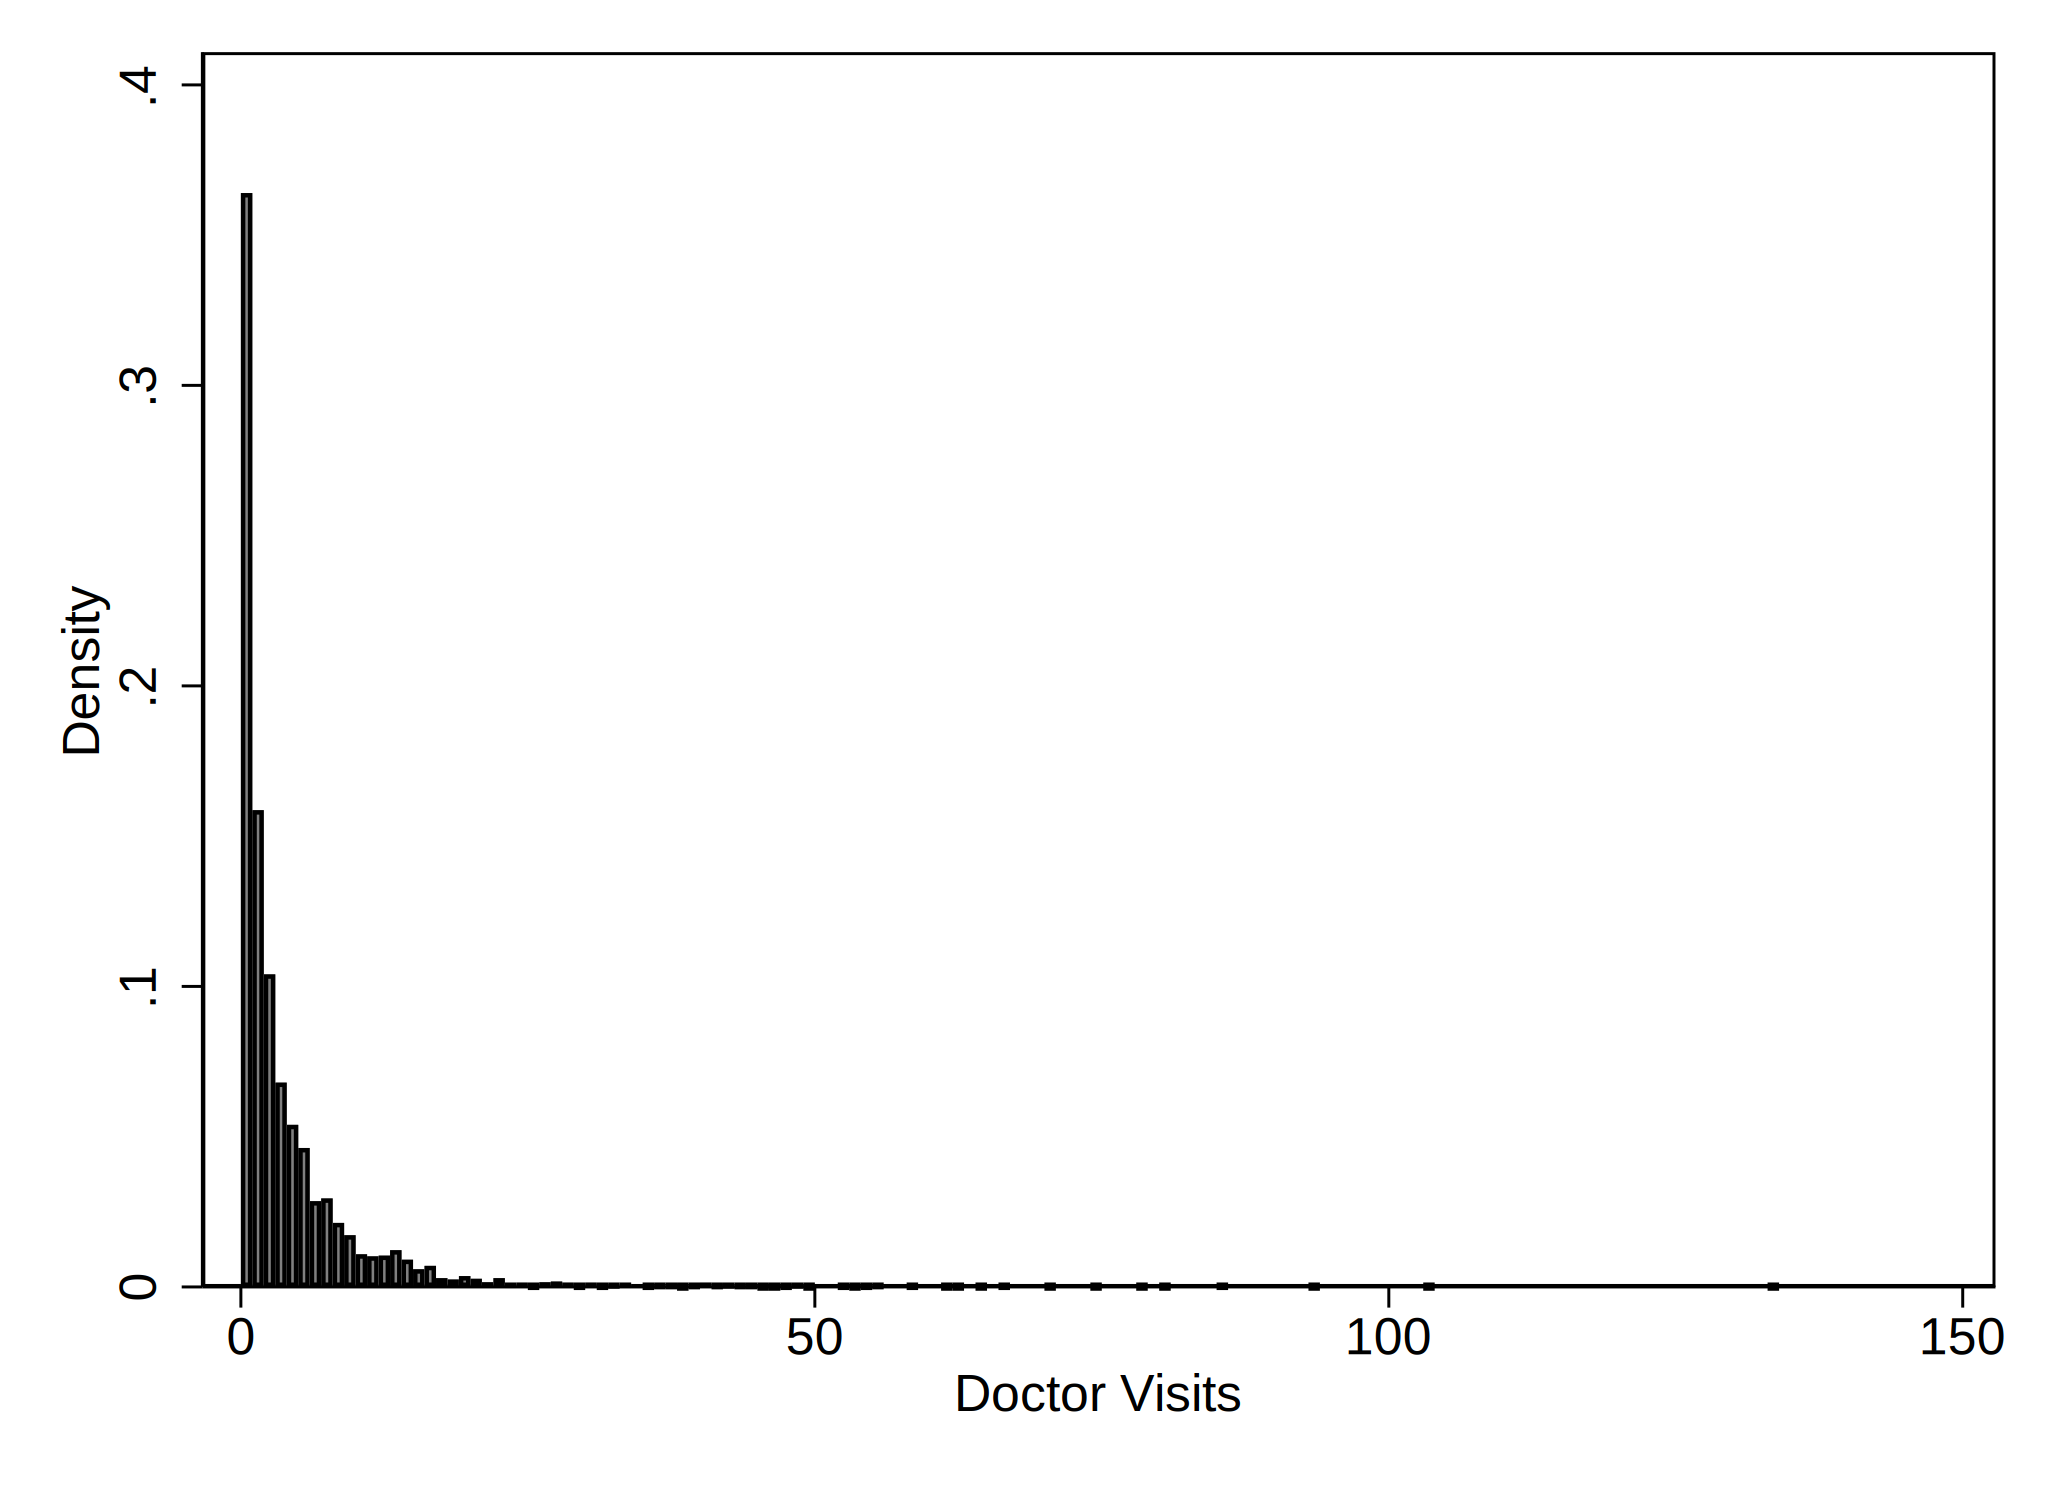

In [3]:
%%stata
set scheme s1mono
histogram docvis, start(0) width(1) xtitle(Doctor Visits)

In [4]:
%%stata
poisson docvis private chronic female income, robust


Iteration 0:   log pseudolikelihood = -18504.413  
Iteration 1:   log pseudolikelihood = -18503.549  
Iteration 2:   log pseudolikelihood = -18503.549  

Poisson regression                                      Number of obs =  4,412
                                                        Wald chi2(4)  = 594.72
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -18503.549                       Pseudo R2     = 0.1930

------------------------------------------------------------------------------
             |               Robust
      docvis | Coefficient  std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     private |   .7986652   .1090014     7.33   0.000     .5850263    1.012304
     chronic |   1.091865   .0559951    19.50   0.000     .9821167    1.201614
      female |   .4925481   .0585365     8.41   0.000     .3778187    .6072774
      income |    

In [5]:
%%stata
nlcom (100*(exp(_b[private])-1)) (100*(exp(_b[chronic])-1)) (100*(exp(_b[female])-1)) (100*_b[income]*2)


       _nl_1: 100*(exp(_b[private])-1)
       _nl_2: 100*(exp(_b[chronic])-1)
       _nl_3: 100*(exp(_b[female])-1)
       _nl_4: 100*_b[income]*2

------------------------------------------------------------------------------
      docvis | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       _nl_1 |   122.2572   24.22636     5.05   0.000     74.77445      169.74
       _nl_2 |   197.9827   16.68558    11.87   0.000     165.2795    230.6858
       _nl_3 |   63.64808   9.579381     6.64   0.000     44.87284    82.42332
       _nl_4 |   .7114025   .2164979     3.29   0.001     .2870745    1.135731
------------------------------------------------------------------------------


Other factors equal:
* The expected number of doctor visits for a person with private insurance is estimated to be about 122.26% higher than for an elderly person without private insurance with the same values for the other explanatory variables.
* The expected number of doctor visits for a person with a chronic disease is estimated to be about 198% higher than for an elderly person without a chronice disease with the same characteristics.
* The expected number of doctor visits of elderly females is roughly 63.65% higher than elderly men ceteris paribus.
* A US $2,000 annual income increase will increase the number of doctor visits of an elderly person by roughly 0.71% ceteris paribus.